# Kickstarter Project Forecast Model

## 1. First understanding

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df = pd.read_csv('data/kickstarter.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## 2. Data cleaning

In [24]:
# drop ID, goal, pledged, usd pledged
df.drop(columns=['ID', 'goal', 'pledged', 'usd pledged','name'], inplace=True)
df.head()

,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


In [25]:
# drop null
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   category          378661 non-null  object 
 1   main_category     378661 non-null  object 
 2   currency          378661 non-null  object 
 3   deadline          378661 non-null  object 
 4   launched          378661 non-null  object 
 5   state             378661 non-null  object 
 6   backers           378661 non-null  int64  
 7   country           378661 non-null  object 
 8   usd_pledged_real  378661 non-null  float64
 9   usd_goal_real     378661 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.9+ MB


## 3. EDA

### 3.1 Tỉ lệ các loại state

In [26]:
variable = 'state'

pie_chart = df[variable].value_counts()
output = pd.DataFrame((df[variable].value_counts()))

In [27]:
temp_pie = pie_chart.iloc[:4]
temp_pie.iloc[3] = pie_chart.iloc[3:].sum()
temp_pie = temp_pie.rename(index= {'undefined' : 'others'})
temp_pie.name = ''

In [28]:
output['Share'] = (output / output.sum()*100).round(2)
output['Share'] = output['Share'].map("{:,.2f}%".format)
output.index.rename('state', inplace=True)

,count,Share
state,,
failed,197719,52.22%
successful,133956,35.38%
canceled,38779,10.24%
undefined,3562,0.94%
live,2799,0.74%
suspended,1846,0.49%


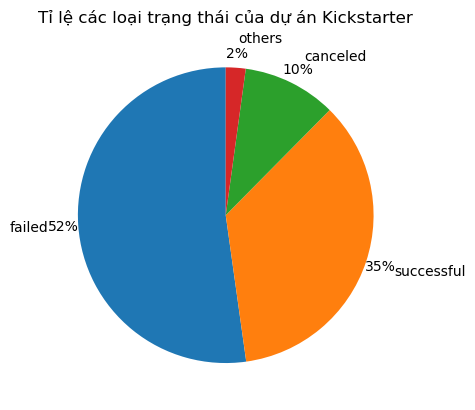

In [29]:
#pie_chart.plot(kind = "pie", startangle=90, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
temp_pie.plot(kind = "pie", startangle=90, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Tỉ lệ các loại trạng thái của dự án Kickstarter')
output

### 3.2 Tỉ lệ các loại main_category

In [30]:
variable = 'main_category'

pie_chart = df[variable].value_counts()
output = pd.DataFrame((df[variable].value_counts()))
output

,count
main_category,
Film & Video,63585
Music,51918
Publishing,39874
Games,35231
Technology,32569
Design,30070
Art,28153
Food,24602
Fashion,22816


In [31]:
temp_pie = pie_chart.iloc[:10]
temp_pie.iloc[9] = pie_chart.iloc[9:].sum()
# name last category as 'others'
temp_pie = temp_pie.rename(index= {'Theater' : 'others'})
temp_pie.name = ''
temp_pie

main_category
Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
others          49843
Name: , dtype: int64

<Axes: >

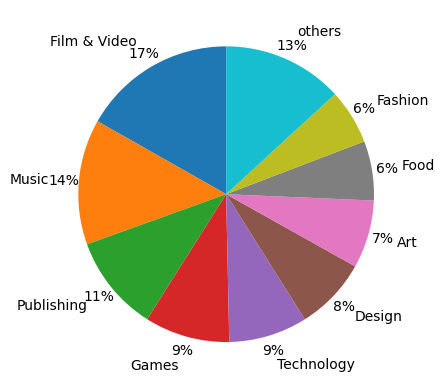

In [32]:
temp_pie.plot(kind = "pie", startangle=90, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

### 3.3 Tỉ lệ thành công của mỗi main category

In [33]:
# number of successful projects and failed projects in each category
df2 = df.groupby(['main_category', 'state']).size().unstack()
df2['total'] = df2['failed'] + df2['successful'] + df2['canceled']
columns = ['successful', 'failed', 'canceled','total']
df2 = df2[columns]
# df2['success_rate'] = (df2['successful'] / df2['total'] * 100).round(2)
df2 = df2.sort_values(by='total', ascending=False)
df2

state,successful,failed,canceled,total
main_category,,,,
Film & Video,23623.0,32904.0,5755.0,62282.0
Music,24197.0,21752.0,3305.0,49254.0
Publishing,12300.0,23145.0,3602.0,39047.0
Games,12518.0,16003.0,6202.0,34723.0
Technology,6434.0,20616.0,4715.0,31765.0
Design,10550.0,14814.0,4152.0,29516.0
Art,11510.0,14131.0,2222.0,27863.0
Food,6085.0,15969.0,2211.0,24265.0
Fashion,5593.0,14182.0,2650.0,22425.0


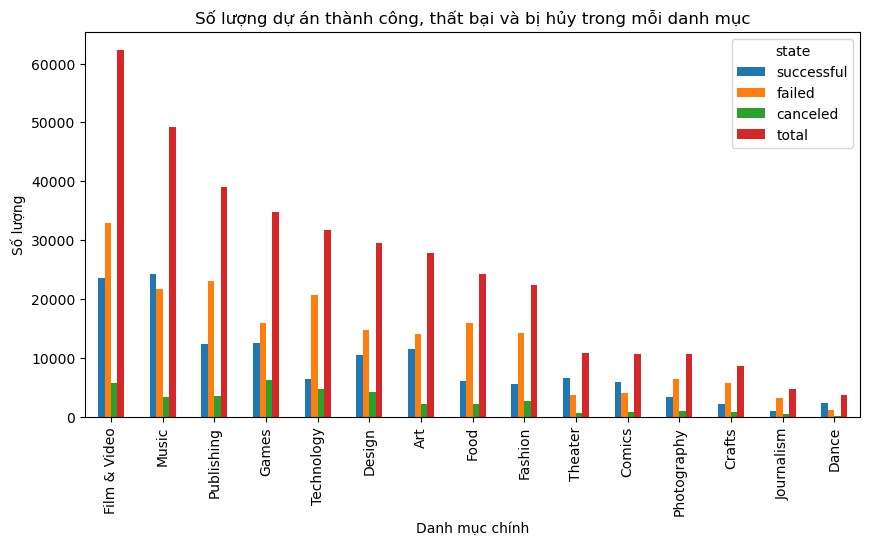

In [34]:
# bar chart of successfull, failed and canceled projects in each category
df2.plot(kind='bar', figsize=(10, 5))
plt.title('Số lượng dự án thành công, thất bại và bị hủy trong mỗi danh mục')
plt.ylabel('Số lượng')
plt.xlabel('Danh mục chính')
plt.show()

### 3.4 Tổng usd_pledged_real của mỗi main category

Text(0.5, 0, 'Danh mục chính')

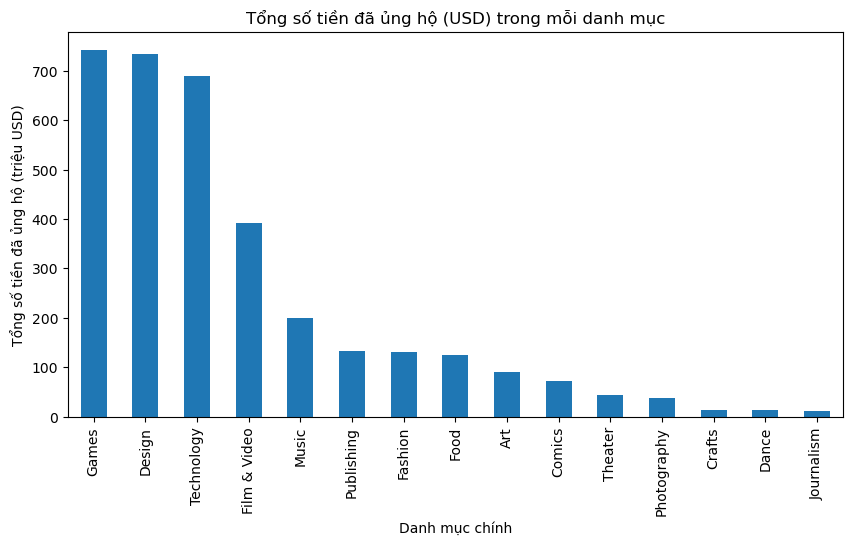

In [35]:
# total usd pledged real in each category
df3 = df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending=False)
df3 = df3 / 1e6
df3.plot(kind='bar', figsize=(10, 5))
plt.title('Tổng số tiền đã ủng hộ (USD) trong mỗi danh mục')
plt.ylabel('Tổng số tiền đã ủng hộ (triệu USD)')
plt.xlabel('Danh mục chính')

### 3.5 Tác động của usd_pledged_real và usd_goal_real đến khả năng thành công

### 3.6 Tỉ lệ tham gia của các quốc gia

### 3.7 Số lượng backer trung bình của các quốc gia

### 3.8 usd_goal_real và usd_pledged_real trung bình của các quốc gia

## 4. Data Pre-processing

In [36]:
# add column launched_month (month of launched)
df['launched_month'] = pd.to_datetime(df['launched']).dt.month

# add column duration (number of days between launched and deadline)
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

df['duration'] = (df['deadline'] - df['launched']).dt.days

# drop launched and deadline
df.drop(columns=['launched', 'deadline'], inplace=True)

# set canceled as failed
df['state'] = df['state'].apply(lambda x: 'failed' if x == 'canceled' else x)

# drop other than successful and failed
df = df[df['state'].isin(['successful', 'failed'])]

# encode categorical variables
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder() 
cate_vars = ['main_category', 'country', 'category', 'state', 'currency']
for var in cate_vars:
    df[var] = lab_enc.fit_transform(df[var])


In [37]:
# write to csv
df.to_csv('data/kickstarter_cleaned.csv', index=False)

In [38]:
df.head()

,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,launched_month,duration
0,108,12,5,0,0,9,0.0,1533.95,8,58
1,93,6,13,0,15,22,2421.0,30000.00,9,59
2,93,6,13,0,3,22,220.0,45000.00,1,44
3,90,10,13,0,1,22,1.0,5000.00,3,29
4,55,6,13,0,14,22,1283.0,19500.00,7,55


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370454 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   category          370454 non-null  int32  
 1   main_category     370454 non-null  int32  
 2   currency          370454 non-null  int32  
 3   state             370454 non-null  int32  
 4   backers           370454 non-null  int64  
 5   country           370454 non-null  int32  
 6   usd_pledged_real  370454 non-null  float64
 7   usd_goal_real     370454 non-null  float64
 8   launched_month    370454 non-null  int32  
 9   duration          370454 non-null  int64  
dtypes: float64(2), int32(6), int64(2)
memory usage: 22.6 MB


## 5. Machine Learning

In [40]:
df = pd.read_csv('data/kickstarter_cleaned.csv')
df.head()

,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,launched_month,duration
0,108,12,5,0,0,9,0.0,1533.95,8,58
1,93,6,13,0,15,22,2421.0,30000.00,9,59
2,93,6,13,0,3,22,220.0,45000.00,1,44
3,90,10,13,0,1,22,1.0,5000.00,3,29
4,55,6,13,0,14,22,1283.0,19500.00,7,55
